## Extented Divergent Fungal Actin (DFA) set - Taxonomic analysis - Kingdom level distribution

**Notebook summary**

This Jupyter Notebook:
- Sorts taxonomic information of the species from the extented cluster into kingdom, phylum and order taxonomic ranks
- Is associated with Step 1 of the Pub approach: Expanding the initial set of fungal species that possess DFA
- Provides the code for the Pub Figures 4A


**Context/Goal reminder**
Divergent Fungal Actins (DFAs) have been identified in another Arcadia's project as potentially new actin isoform mainly found in Fungi. In this work, we have identified an extented set of 436 DFA sequences by combining the 2 new clusters identified in the DFA ProteinCartography run and the original DFA cluster. While the original cluster mainly contain fungal species, we want to characterize the kingdom-level distribution of the organisms that possess DFA in the extended cluster. 

**Notebook purpose**
The purpose of this notebook is to investigate the extended set of DFA sequences and the taxonomy of the associated species. In this notebook, we:
- characterize the different kingdom where DFA is found
- visualize the distribution of DFA at the kingdom level

---

### Setup path and environment

In [17]:
setwd('..')

library(tidyverse)
library(ggplot2)
library(ggtree)
library(ape)

Warning message:
“package ‘ape’ was built under R version 4.2.2”

Attaching package: ‘ape’


The following object is masked from ‘package:ggtree’:

    rotate




### Function definition

In [1]:
# For each protein ID, the function extracts the associated organism information as well as its lineage information -
# We further parse lineage information associated with 'Kingdom', 'phylum' ,'class' and 'order' when available


lin_inf_str=function(data){
  dat=data[,c('protid','Organism','Taxonomic.lineage')]
  
  data_taxo=data.frame()
  
  for (i in 1:dim(dat)[1]){
    line=dat[i,'Taxonomic.lineage']
    vec_lin=c(strsplit(line, ",")[[1]])
    
    #extraction of kingdom info
    loc_king=grep('(kingdom)',vec_lin,fixed=TRUE)
    
    king_inf=vec_lin[loc_king]
    
    if (length(loc_king)>=1){
      vec_kin=c(strsplit(king_inf, " ")[[1]])
      
      kingdom=vec_kin[2]
      
    }
    
    if (length(loc_king)==0){
      kingdom='no_kingdom_rank'
    }
    
    #extraction of phylum info
    loc_phy=grep('(phylum)',vec_lin,fixed=TRUE)
    
    phy_inf=vec_lin[loc_phy]
    
    if (length(loc_phy)>=1){
      vec_phy=c(strsplit(phy_inf, " ")[[1]])
      
      phylum=vec_phy[2]
      
    }
    
    if (length(loc_phy)==0){
      phylum='no_phylum_rank'
    }
    
    #extraction of order info
    loc_ord=grep('(order)',vec_lin,fixed=TRUE)
    
    ord_inf=vec_lin[loc_ord]
    
    if (length(loc_ord)>=1){
      vec_ord=c(strsplit(ord_inf, " ")[[1]])
      
      orderO=vec_ord[2]
      
    }
    
    if (length(loc_ord)==0){
      orderO='no_order_rank'
    }
    
    dat_temp=data.frame(dat[i,],
                        'Kingdom'=kingdom,'Phylum'=phylum,'Order'=orderO)
    
    data_taxo=rbind(data_taxo,dat_temp)

  }
  
  data_taxo
  
}

### Analysis

In [7]:
## Data import

data_ext=read.csv('data/step1/Extended_cluster_hits_DFA.csv')  # file with extended cluster information (resulting from the combnation of the new ProteinCartography DFA clusters and original DFA cluster)

In [8]:
## Sorting taxonomic information into kingdom/phylum, and order
DFA_clust_taxo=lin_inf_str(data_ext)
head(DFA_clust_taxo,10)

,protid,Organism,Taxonomic.lineage,Kingdom,Phylum,Order
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A0A015ICG5,Rhizophagus irregularis (strain DAOM 197198w) (Glomus intraradices),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Fungi incertae sedis (no rank), Mucoromycota (phylum), Glomeromycotina (subphylum), Glomeromycetes (class), Glomerales (order), Glomeraceae (family), Rhizophagus (genus), Rhizophagus irregularis (species)",Fungi,Mucoromycota,Glomerales
2,A0A0B7FRH7,Thanatephorus cucumeris (strain AG1-IB / isolate 7/3/14) (Lettuce bottom rot fungus) (Rhizoctonia solani),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Agaricomycotina (subphylum), Agaricomycetes (class), Agaricomycetes incertae sedis (no rank), Cantharellales (order), Ceratobasidiaceae (family), Rhizoctonia (genus), Rhizoctonia solani (species), Rhizoctonia solani AG-1 (no rank)",Fungi,Basidiomycota,Cantharellales
3,A0A1E3I214,Cryptococcus depauperatus CBS 7841,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Agaricomycotina (subphylum), Tremellomycetes (class), Tremellales (order), Cryptococcaceae (family), Cryptococcus (genus), Cryptococcus depauperatus (species)",Fungi,Basidiomycota,Tremellales
4,A0A4P9W5S9,Blyttiomyces helicus,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Fungi incertae sedis (no rank), Chytridiomycota (phylum), Chytridiomycota incertae sedis (no rank), Chytridiomycetes (class), Chytridiomycetes incertae sedis (no rank), Blyttiomyces (genus)",Fungi,Chytridiomycota,no_order_rank
5,C6H2X6,Ajellomyces capsulatus (strain H143) (Darling's disease fungus) (Histoplasma capsulatum),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Ascomycota (phylum), saccharomyceta (no rank), Pezizomycotina (subphylum), leotiomyceta (no rank), Eurotiomycetes (class), Eurotiomycetidae (subclass), Onygenales (order), Ajellomycetaceae (family), Histoplasma (genus), Ajellomyces capsulatus (species)",Fungi,Ascomycota,Onygenales
6,A0A507EZQ4,Chytriomyces confervae,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Fungi incertae sedis (no rank), Chytridiomycota (phylum), Chytridiomycota incertae sedis (no rank), Chytridiomycetes (class), Chytridiales (order), Chytriomycetaceae (family), Chytriomyces (genus)",Fungi,Chytridiomycota,Chytridiales
7,A0A1M8A8G9,Malassezia sympodialis (strain ATCC 42132) (Atopic eczema-associated yeast),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Ustilaginomycotina (subphylum), Malasseziomycetes (class), Malasseziales (order), Malasseziaceae (family), Malassezia (genus), Malassezia sympodialis (species)",Fungi,Basidiomycota,Malasseziales
8,U5HBM6,Microbotryum lychnidis-dioicae (strain p1A1 Lamole / MvSl-1064) (Anther smut fungus),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Pucciniomycotina (subphylum), Microbotryomycetes (class), Microbotryales (order), Microbotryaceae (family), Microbotryum (genus), Microbotryum lychnidis-dioicae (species)",Fungi,Basidiomycota,Microbotryales
9,A0A8A3P372,Monilinia vaccinii-corymbosi,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Ascomycota (phylum), saccharomyceta (no rank), Pezizomycotina (subphylum), leotiomyceta (no rank), sordariomyceta (no rank), Leotiomycetes (class), Helotiales (order), Sclerotiniaceae (family), Monilinia (genus)",Fungi,Ascomycota,Helotiales


In [12]:
## Data export for manually curation of no kingdom rank entries
    # 16 entries have no kingdom rank
    # we have to curate them manually and add clade information instead: This includes: Discoba, Sar, Amoebozoa and Opisthokonta

write.csv(DFA_clust_taxo,"results/step1/DFA_clust_taxo_final_intermed.csv")

## Manually corrected data import
data_taxo_DFA=read.csv('data/step1/DFA_clust_taxo_manually_corrected.csv')[-1]
head(data_taxo_DFA,10)


,protid,Organism,Taxonomic.lineage,Kingdom,Phylum,Order
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A0A015ICG5,Rhizophagus irregularis (strain DAOM 197198w) (Glomus intraradices),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Fungi incertae sedis (no rank), Mucoromycota (phylum), Glomeromycotina (subphylum), Glomeromycetes (class), Glomerales (order), Glomeraceae (family), Rhizophagus (genus), Rhizophagus irregularis (species)",Fungi,Mucoromycota,Glomerales
2,A0A060SBE2,Pycnoporus cinnabarinus (Cinnabar-red polypore) (Trametes cinnabarina),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Agaricomycotina (subphylum), Agaricomycetes (class), Agaricomycetes incertae sedis (no rank), Polyporales (order), Polyporaceae (family), Trametes (genus)",Fungi,Basidiomycota,Polyporales
3,A0A061AJ95,Cyberlindnera fabianii (Yeast) (Hansenula fabianii),"Cyberlindnera (genus), Phaffomycetaceae (family), Saccharomycetales (order), Saccharomycetes (class), Saccharomycotina (subphylum), saccharomyceta (no rank), Ascomycota (phylum), Dikarya (subkingdom), Fungi (kingdom), Opisthokonta (no rank), Eukaryota (superkingdom), cellular organisms (no rank)",Fungi,Ascomycota,Saccharomycetales
4,A0A061HA90,Pseudozyma flocculosa PF-1,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Ustilaginomycotina (subphylum), Ustilaginomycetes (class), Ustilaginales (order), Ustilaginaceae (family), Pseudozyma (genus), Pseudozyma flocculosa (species)",Fungi,Basidiomycota,Ustilaginales
5,A0A066VBJ4,Tilletiaria anomala (strain ATCC 24038 / CBS 436.72 / UBC 951),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Ustilaginomycotina (subphylum), Exobasidiomycetes (class), Georgefischeriales (order), Tilletiariaceae (family), Tilletiaria (genus), Tilletiaria anomala (species)",Fungi,Basidiomycota,Georgefischeriales
6,A0A067LYG7,Botryobasidium botryosum FD-172 SS1,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Agaricomycotina (subphylum), Agaricomycetes (class), Agaricomycetes incertae sedis (no rank), Cantharellales (order), Botryobasidiaceae (family), Botryobasidium (genus), Botryobasidium botryosum (species)",Fungi,Basidiomycota,Cantharellales
7,A0A067QC48,Jaapia argillacea MUCL 33604,"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Agaricomycotina (subphylum), Agaricomycetes (class), Agaricomycetidae (subclass), Jaapiales (order), Jaapiaceae (family), Jaapia (genus), Jaapia argillacea (species)",Fungi,Basidiomycota,Jaapiales
8,A0A067TP80,Galerina marginata (strain CBS 339.88),"cellular organisms (no rank), Eukaryota (superkingdom), Opisthokonta (no rank), Fungi (kingdom), Dikarya (subkingdom), Basidiomycota (phylum), Agaricomycotina (subphylum), Agaricomycetes (class), Agaricomycetidae (subclass), Agaricales (order), Agaricineae (suborder), Strophariaceae (family), Galerina (genus), Galerina marginata (species)",Fungi,Basidiomycota,Agaricales
9,A0A068RS63,Lichtheimia corymbifera JMRC:FSU:9682,"Lichtheimia corymbifera (species), Lichtheimia (genus), Lichtheimiaceae (family), Mucorales (order), Mucoromycetes (class), Mucoromycotina (subphylum), Mucoromycota (phylum), Fungi incertae sedis (no rank), Fungi (kingdom), Opisthokonta (no rank), Eukaryota (superkingdom), cellular organisms (no rank)",Fungi,Mucoromycota,Mucorales


In [14]:
## Kingdom / Clade species count
    # To investigate the distribution of DFA at the kingdom level, we now count how many protein hits were found for each kingdom or clade

taxo_table=as.data.frame(t(table(data_taxo_DFA$Kingdom)))

colnames(taxo_table)=c('tip.label','Taxo','nb_hits')

# we add representative species name for each kingdom/clade - they are the same ones used to build the phylogenetic tree (tree tip.label)
rep_species=c('Acanthamoeba_castellanii',
              'Trypanosoma_cruzi','Aureobasidium_pullulans',
              'Rattus_norvegicus',
              'Sphaeroforma_arctica','Perkinsus_olseni',
              'Oryza_sativa')

taxo_table$tip.label=rep_species

taxo_table

tip.label,Taxo,nb_hits
<chr>,<fct>,<int>
Acanthamoeba_castellanii,Amoebozoa,1
Trypanosoma_cruzi,Discoba,5
Aureobasidium_pullulans,Fungi,406
Rattus_norvegicus,Metazoa,10
Sphaeroforma_arctica,Opisthokonta,1
Perkinsus_olseni,Sar,9
Oryza_sativa,Viridiplantae,4


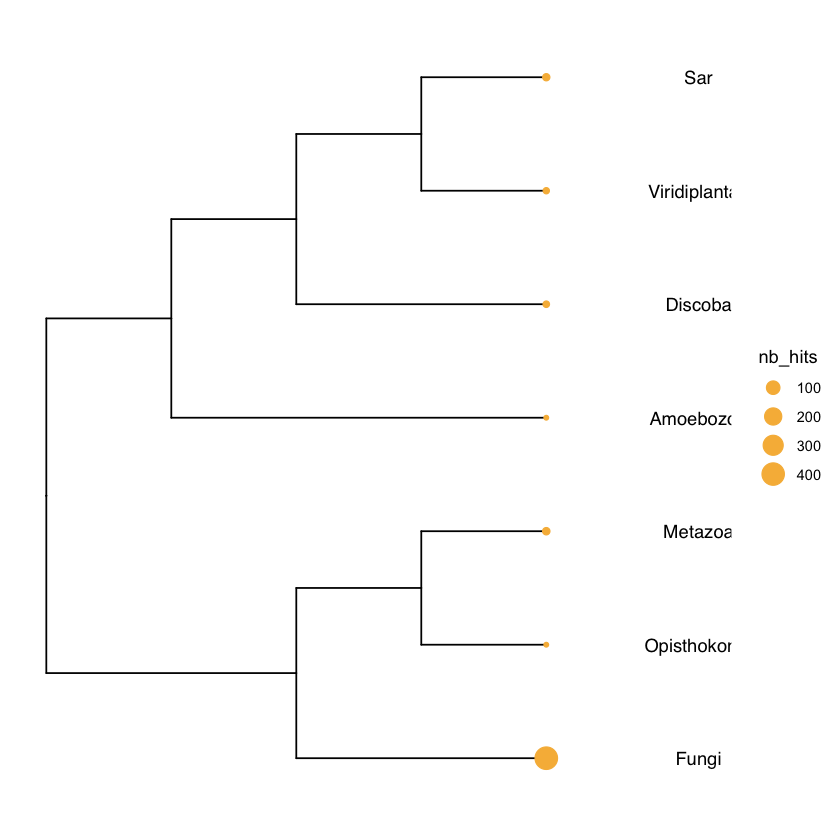

In [19]:
## Tree representation of DFA kingdom/clade distribution (Figure 4A)

tree_king=read.tree('data/step1/DFA_king_tree.nwk')  # import the newick phylogenetic tree file

tree_tips=c(intersect(tree_king$tip.label,taxo_table$tip.label)) # make sure that data are consistent between table and tree tips

tree_pruned=keep.tip(tree_king,tree_tips) # prune the tree to only keep tips of representative sequences

p=ggtree(tree_pruned, branch.length="none") %<+% taxo_table 

p_tree <- p + geom_tiplab(aes(label=Taxo),offset = 1.2, hjust = .5) +
  geom_tippoint(aes(size = nb_hits),color ='#F7B846') + 
  theme(legend.position = "right")

p_tree


In [20]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/manonmorin/miniconda3/envs/R_analysis_env/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ape_5.7-1       ggtree_3.6.0    forcats_0.5.2   stringr_1.5.0  
 [5] dplyr_1.0.10    purrr_0.3.5     readr_2.1.3     tidyr_1.2.1    
 [9] tibble_3.1.8    ggplot2_3.3.6   tidyverse_1.3.2

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9          lubridate_1.8.0     lattice_0.20-45    
 [4] assertthat_0.2.1    digest_0.6.30       utf8_1.2.2         
 [7] IRdisplay_1.1       R6_2.5.1            cellranger_1.1.0   
[10] repr_1.1.4          backports_1.4.1     reprex_2.0.2       
[13] evaluate_0.17       ggfun_0.1.3         httr_1.4.4         
[16] pil